<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/categorical_feature_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

# Example categories
categories = ["Residential", "Commercial", "Industrial", "Agricultural"]

# Convert categories to indices
category_to_index = {cat: idx for idx, cat in enumerate(categories)}
num_categories = len(category_to_index)

# Define embedding layer
embedding_dim = 4  # Choose embedding size
embedding_layer = nn.Embedding(num_categories, embedding_dim)



In [3]:
# Convert "Commercial" to embedding
category_idx = torch.tensor([category_to_index["Commercial"]])
embedding_vector = embedding_layer(category_idx)

print(f"Embedding for 'Commercial': {embedding_vector}")

Embedding for 'Commercial': tensor([[-0.0963,  0.0177, -1.7618,  0.3537]], grad_fn=<EmbeddingBackward0>)


In [4]:
# Convert "Commercial" to embedding
category_idx = torch.tensor([category_to_index["Residential"]])
embedding_vector = embedding_layer(category_idx)

print(f"Embedding for 'Residential': {embedding_vector}")

Embedding for 'Residential': tensor([[ 1.2181, -1.2387, -0.1992,  0.0695]], grad_fn=<EmbeddingBackward0>)


In [5]:
# Convert "Commercial" to embedding
category_idx = torch.tensor([category_to_index["Industrial"]])
embedding_vector = embedding_layer(category_idx)

print(f"Embedding for 'Industrial': {embedding_vector}")

Embedding for 'Industrial': tensor([[-0.0521,  0.8606,  1.9217,  0.7370]], grad_fn=<EmbeddingBackward0>)


In [6]:
# Convert "Commercial" to embedding
category_idx = torch.tensor([category_to_index["Agricultural"]])
embedding_vector = embedding_layer(category_idx)

print(f"Embedding for 'Agricultural': {embedding_vector}")

Embedding for 'Agricultural': tensor([[-0.5513,  2.0033,  0.1516,  0.5232]], grad_fn=<EmbeddingBackward0>)


In [8]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz

--2025-02-19 01:19:13--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.66.102, 16.182.67.72, 52.216.37.24, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.66.102|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-19 01:19:13 ERROR 404: Not Found.

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [7]:
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec (or FastText) model
word2vec_model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

# Convert category to embedding
embedding_vector = word2vec_model["Residential"]
print(embedding_vector)


FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [9]:
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    "property_type": ["Residential", "Commercial", "Industrial", "Residential", "Commercial"],
    "price": [300000, 500000, 700000, 320000, 480000]
})

# Compute target encoding
encoding_map = df.groupby("property_type")["price"].mean().to_dict()
df["property_type_encoded"] = df["property_type"].map(encoding_map)

print(df)


  property_type   price  property_type_encoded
0   Residential  300000               310000.0
1    Commercial  500000               490000.0
2    Industrial  700000               700000.0
3   Residential  320000               310000.0
4    Commercial  480000               490000.0


In [10]:
df["property_type_encoded"] = df["property_type"].map(df["property_type"].value_counts(normalize=True))
print(df)

  property_type   price  property_type_encoded
0   Residential  300000                    0.4
1    Commercial  500000                    0.4
2    Industrial  700000                    0.2
3   Residential  320000                    0.4
4    Commercial  480000                    0.4


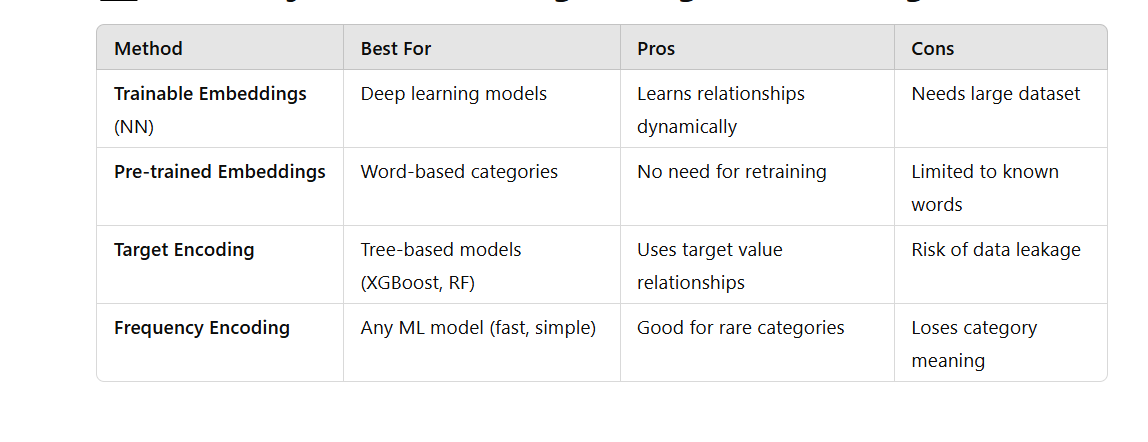